In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

# Llevamos el repositorio a nuestro drive

In [ ]:
# Esto solo debemos ejecutarlo una vez. Si lo ejecutamos mas de una vez va a fallar (pero no pasa nada!)
!mkdir /content/gdrive/My\ Drive/ml-practico/code
# Acá podes usar tu propio repo si queres hacer modificaciones (highly recommended)
!git clone https://github.com/elsonidoq/machine_learning_practico /content/gdrive/My\ Drive/ml-practico/code

In [ ]:
# Si hay cambios en el repositorio, con esta linea actualizas tu drive
!cd /content/gdrive/My\ Drive/ml-practico/code; git checkout clase-3; git pull

In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/ml-practico/code')

In [1]:
import sys
# Para trabajar local
sys.path.append('/Users/przivic/prog/machine_learning_practico')

# Loading the data

In [2]:
from lib import model, data

In [3]:
from pathlib import Path

# Para trabajar en colab
PATH = Path('/content/gdrive/My Drive/ml-practico/data/')

# Para trabajar local
PATH = Path('../../data/')

In [ ]:
movies = data.load_data(PATH)

Loading title basics...


/Users/przivic/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loading title ratings...
Loading movie directors...


In [ ]:
train_df = movies[movies.startYear <= 2017]
test_df = movies[movies.startYear > 2017]

len(train_df), len(test_df), len(test_df) / len(train_df)

In [ ]:
y_train = train_df.averageRating
y_test = test_df.averageRating

X_train = train_df.to_dict(orient='records')
X_test = test_df.to_dict(orient='records')

# Modelling per se

### Armamos todos los problemas de clasificacion

In [ ]:
import numpy as np

thresholds = np.linspace(1.5, 9.5, 15)
thresholds

In [ ]:
# El punto medio entre cada par de threshold, util para graficar
mids = [(t0 + t1)/2 for t0, t1 in zip(thresholds[:-1], thresholds[1:])]

In [ ]:
def get_bools(y):
    res = []
    for t in thresholds:
        res.append(y <= t)
    return res

ys_train = get_bools(y_train)
ys_test = get_bools(y_test)

### Armamos los modelos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

models = [
    model.get_model_pipe(
        features_pipe=model.get_features_pipe(
            use_years=False, use_director=True, use_genre=True, post_processing=StandardScaler()
        ),
        model=LogisticRegression()   
    )
    for _ in range(len(thresholds))
]

### Entrenamos

In [ ]:
for i, m in enumerate(models):
    print(i)
    m.fit(X_train, ys_train[i])

### Visualizamos los modelos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from random import randint

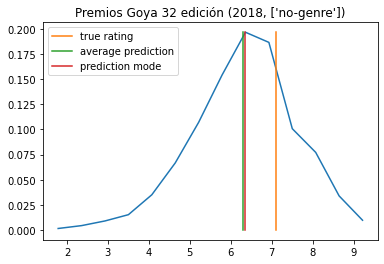

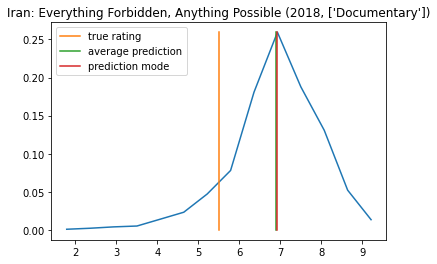

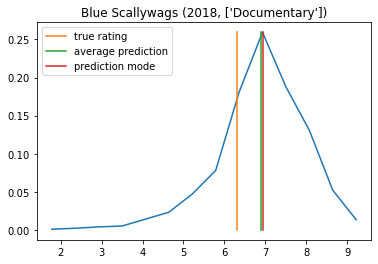

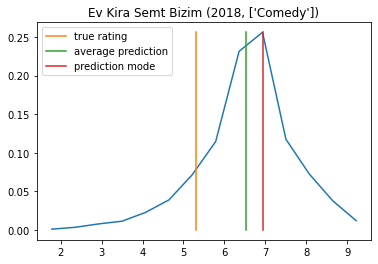

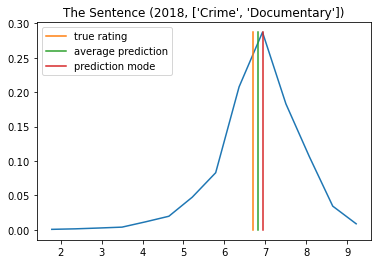

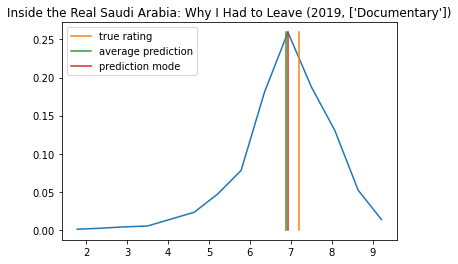

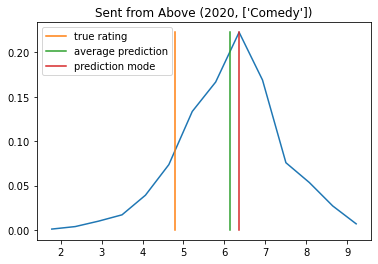

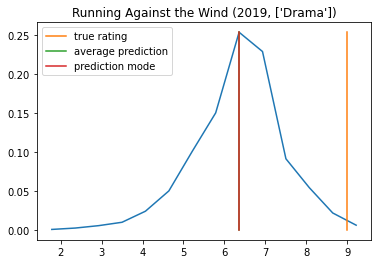

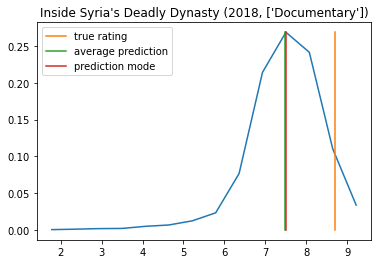

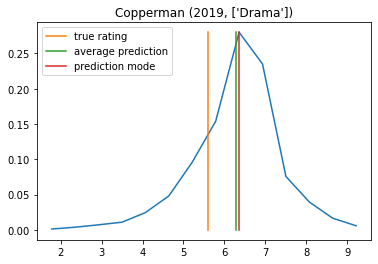

In [13]:
dt = X_test
y_dt = y_test

for _ in range(10):
    i = randint(0, len(dt))

    plt.figure()
    plt.title('{originalTitle} ({startYear:.00f}, {genres})'.format(**dt[i]))
    preds = np.asarray([m.predict_proba([dt[i]])[0,1] for m in models])
    preds = preds[1:] - preds[:-1]

    plt.plot(mids, preds, '-o', label='predicted distribution')
    plt.plot([y_dt.iloc[i], y_dt.iloc[i]], [0, preds.max()], label='true rating')
    plt.plot([(preds * mids).sum(), (preds * mids).sum()], [0, preds.max()], label='average prediction')
    plt.plot([mids[preds.argmax()], mids[preds.argmax()]], [0, preds.max()], label='prediction mode')
    plt.legend(loc='best')
    plt.xlabel('Rating value')
    plt.ylabel('Probabilty')
    

# Para pensar

Pensando en el contexto de querer brindar una herramienta que guie la construccion de guiones

* Nos da algún tipo de ventaja para construir un mejor producto esta técnica?
* Qué metrica offline podemos usar para evaluar este modelo?
* Habría una ventaja de utilizar un modelo basado en arboles?
* Para leer: Cómo se podría empaquetar este código en algo compatible con sklearn.linear_models.LogisticRegression? 